In [98]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/emotion-classification-ai-class/data_train.csv
/kaggle/input/emotion-classification-ai-class/data_test.csv
/kaggle/input/emotion-classification-ai-class/sample_solution.csv


In [99]:
import numpy as np
import pandas as pd

import nltk  # Import modul nltk
from nltk.tokenize import word_tokenize  # Import word_tokenize dari nltk.tokenize
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import spacy
import matplotlib.pyplot as plt


In [100]:
import pandas as pd

# Load the training and test data
train_file_path = "/kaggle/input/emotion-classification-ai-class/data_train.csv"
test_file_path = "/kaggle/input/emotion-classification-ai-class/data_test.csv"

data_train = pd.read_csv(train_file_path)
data_test = pd.read_csv(test_file_path)

# Select relevant columns
data_train = data_train[['Customer Review', 'Emotion']]
data_test = data_test[['Customer Review']]

# Handle missing values if any
data_train.dropna(inplace=True)
data_test.dropna(inplace=True)



In [101]:
# Print the shape of dataframe
print(data_train.shape)
display(data_train.head())

(4320, 2)


,Customer Review,Emotion
0,"baguuuus, sesuai dengan pesanan. semoga sukses...",Happy
1,Warna tidak sesuai permintaan padahal sudah di...,Sadness
2,sesuai yang dipesan. Terima kasih,Happy
3,ps nya ga awet...Belom ada 2 bulan udah rusak ...,Sadness
4,Kualitas kurmanya top. Dagingnya tebal dan lem...,Happy


In [102]:
print(data_test.shape)
display(data_test.head())

(1080, 1)


,Customer Review
0,"prod dikirim dgn dilipat,tdk digulung padahal ..."
1,"Produk top markotop bangeet deh, selalu ada pr..."
2,Teksturnya keras. Hasilnya tebal. Gampang dipa...
3,Build kokoh. Kualitas bahan bagus. Bisa nahan ...
4,"Barang sesuai, untuk ukuran mesin cuci 1 tabun..."


In [103]:
# Display basic information about the training data
print("Training Data Info:")
print(data_train.info())

Training Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4320 entries, 0 to 4319
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Customer Review  4320 non-null   object
 1   Emotion          4320 non-null   object
dtypes: object(2)
memory usage: 67.6+ KB
None


In [104]:
# Display basic information about the test data
print("Test Data Info:")
print(data_test.info())

Test Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 1 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Customer Review  1080 non-null   object
dtypes: object(1)
memory usage: 8.6+ KB
None


In [105]:
# Display basic statistics about the training data
print("\nTraining Data Description:")
print(data_train.describe())


Training Data Description:
               Customer Review Emotion
count                     4320    4320
unique                    4258       5
top     Kualitas Produk Bagus.   Happy
freq                         4    1426


In [106]:
# Display basic statistics about the test data
print("\nTest Data Description:")
print(data_test.describe())


Test Data Description:
            Customer Review
count                  1080
unique                 1077
top     Roti keras gak enak
freq                      2


In [107]:
# Display the number of missing values in the training data
print("\nMissing Values in Training Data:")
print(data_train.isnull().sum())


Missing Values in Training Data:
Customer Review    0
Emotion            0
dtype: int64


In [108]:
# Display the number of missing values in the test data
print("\nMissing Values in Test Data:")
print(data_test.isnull().sum())



Missing Values in Test Data:
Customer Review    0
dtype: int64


In [109]:
# Check the distribution of Emotion
emotion_distribution = data_train['Emotion'].value_counts()

# Display the distribution
print("Emotion Distribution in Training Data:")
print(emotion_distribution)


Emotion Distribution in Training Data:
Emotion
Happy      1426
Sadness     943
Fear        753
Love        641
Anger       557
Name: count, dtype: int64


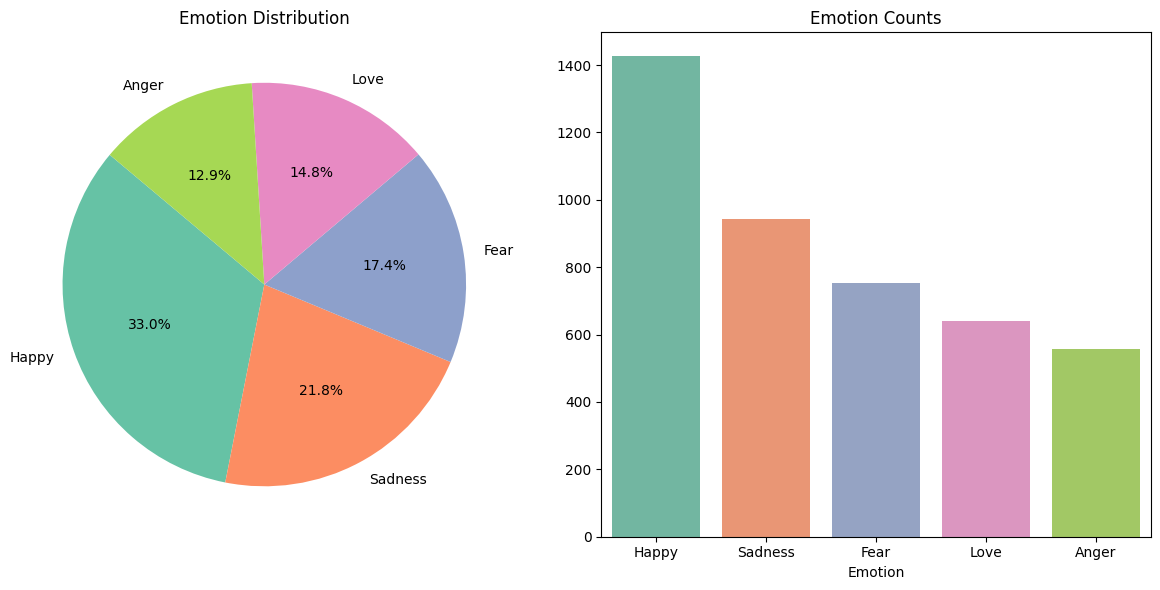

In [110]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data_train' and 'emotion_count' are defined
emotion_count = data_train['Emotion'].value_counts()

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6), facecolor='white')

# Plot pie chart on the first subplot
palette = sns.color_palette("Set2", len(emotion_count))  # Change to Set2 palette
sns.set_palette(palette)
axs[0].pie(emotion_count, labels=emotion_count.index, autopct='%1.1f%%', startangle=140)
axs[0].set_title('Emotion Distribution')

# Plot bar chart on the second subplot
sns.barplot(x=emotion_count.index, y=emotion_count.values, ax=axs[1], palette="Set2")
axs[1].set_title('Emotion Counts')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


In [111]:
# Show sample from training data
print("\nSample Reviews with Emotions:")
for i in range(5):
    print(f"{i+1}: {data_train['Customer Review'].iloc[i]} -> {data_train['Emotion'].iloc[i]}")


Sample Reviews with Emotions:
1: baguuuus, sesuai dengan pesanan. semoga sukses selalu.. -> Happy
2: Warna tidak sesuai permintaan padahal sudah di beri note, tetap saja dikirim warna random -> Sadness
3: sesuai yang dipesan. Terima kasih -> Happy
4: ps nya ga awet...Belom ada 2 bulan udah rusak padahal pemakaian biasa aja malah jarang di pake tau2 rusak sendiri -> Sadness
5: Kualitas kurmanya top. Dagingnya tebal dan lembut. Packing bagus, setelah tutup box dibuka kurma masih dibungkus plastik. Mau order lagi -> Happy


In [112]:
!pip install Sastrawi


import string
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# Initialize stopwords in Indonesian
stop_words = set(stopwords.words('indonesian'))

# Initialize Sastrawi stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Function for advanced preprocessing
def preprocess_advanced(text):
    # Normalize text
    text = text.lower()
    
    # Remove special characters
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    
    # Tokenize text
    tokens = word_tokenize(text)
    
    # Remove stopwords and punctuation
    filtered_tokens = [token for token in tokens if token.lower() not in stop_words and token not in string.punctuation]
    
    # Stemming using Sastrawi
    stemmed_tokens = [stemmer.stem(token) for token in filtered_tokens]
    
    return " ".join(stemmed_tokens)

# Example: Apply preprocessing to Customer Review column
data_train['Customer Review'] = data_train['Customer Review'].apply(preprocess_advanced)
data_test['Customer Review'] = data_test['Customer Review'].apply(preprocess_advanced)


/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


In [113]:
# Display the first 5 rows of training data after preprocessing
print("\nData Training setelah Preprocessing:")
display(data_train.head())


Data Training setelah Preprocessing:


,Customer Review,Emotion
0,baguuuus sesuai pesan moga sukses,Happy
1,warna sesuai minta note kirim warna random,Sadness
2,sesuai pes terima kasih,Happy
3,ps nya ga awetbelom udah rusak pakai aja jaran...,Sadness
4,kualitas kurma top daging tebal lembut packing...,Happy


In [114]:
# Display the first 5 rows of test data after preprocessing
print("\nData Test setelah Preprocessing:")
display(data_test.head())


Data Test setelah Preprocessing:


,Customer Review
0,prod kirim dgn dilipattdk gulung utk backgroun...
1,produk top markotop bangeet deh promo ikan seh...
2,tekstur keras hasil tebal gampang pakai gampan...
3,build kokoh kualitas bahan bagus nahan beban h...
4,barang sesuai ukur mesin cuci tabung pas bange...


In [115]:
# Inisialisasi LabelEncoder
le = LabelEncoder()

# Encode label emosi
data_train['Emotion_Encoded'] = le.fit_transform(data_train['Emotion'])

# Tampilkan 5 baris pertama DataFrame setelah encoding
print("\nDataFrame setelah encoding label:")
print(data_train.head(5))


DataFrame setelah encoding label:
                                     Customer Review  Emotion  Emotion_Encoded
0                  baguuuus sesuai pesan moga sukses    Happy                2
1         warna sesuai minta note kirim warna random  Sadness                4
2                            sesuai pes terima kasih    Happy                2
3  ps nya ga awetbelom udah rusak pakai aja jaran...  Sadness                4
4  kualitas kurma top daging tebal lembut packing...    Happy                2


In [116]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Bagi data menjadi data latih dan data validasi
X_train, X_val, y_train, y_val = train_test_split(data_train['Customer Review'], data_train['Emotion_Encoded'], test_size=0.2, random_state=42)

# TF-IDF Vectorizer untuk ekstraksi fitur teks
tfidf_vectorizer = TfidfVectorizer()

# Multinomial Naive Bayes
nb_classifier = MultinomialNB()

# Pipeline
pipeline_nb = Pipeline([
    ('tfidf', tfidf_vectorizer),
    ('clf', nb_classifier)
])

# Grid parameter untuk GridSearchCV
param_grid_nb = {
    'tfidf__max_features': [1000, 3000, 5000],
    'tfidf__ngram_range': [(1, 1), (1, 2)],  
    'clf__alpha': [0.1, 0.5, 1.0],
}

# Inisialisasi GridSearchCV
grid_search_nb = GridSearchCV(estimator=pipeline_nb, param_grid=param_grid_nb, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Fit GridSearchCV pada data latih
grid_search_nb.fit(X_train, y_train)

# Cetak parameter terbaik dan skor terbaik
print("\nParameter terbaik untuk Naive Bayes:")
print(grid_search_nb.best_params_)
print("\nSkor terbaik untuk Naive Bayes:")
print(grid_search_nb.best_score_)

# Dapatkan model terbaik dari GridSearchCV
best_model_nb = grid_search_nb.best_estimator_

# Evaluasi pada data validasi
y_pred_nb_val = best_model_nb.predict(X_val)
accuracy_nb_val = accuracy_score(y_val, y_pred_nb_val)
print(f'\nAkurasi Validasi (Naive Bayes): {accuracy_nb_val:.4f}')
print(classification_report(y_val, y_pred_nb_val))

Fitting 5 folds for each of 18 candidates, totalling 90 fits


/opt/conda/lib/python3.10/site-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
/opt/conda/lib/python3.10/site-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()



Parameter terbaik untuk Naive Bayes:
{'clf__alpha': 0.1, 'tfidf__max_features': 5000, 'tfidf__ngram_range': (1, 2)}

Skor terbaik untuk Naive Bayes:
0.570890809164903

Akurasi Validasi (Naive Bayes): 0.5671
              precision    recall  f1-score   support

           0       0.47      0.37      0.42       100
           1       0.45      0.39      0.42       152
           2       0.65      0.85      0.74       289
           3       0.66      0.34      0.45       148
           4       0.49      0.56      0.52       175

    accuracy                           0.57       864
   macro avg       0.54      0.50      0.51       864
weighted avg       0.56      0.57      0.55       864



In [117]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

# Bagi data menjadi data latih dan data validasi
X_train, X_val, y_train, y_val = train_test_split(data_train['Customer Review'], data_train['Emotion_Encoded'], test_size=0.2, random_state=42)

# TF-IDF Vectorizer untuk ekstraksi fitur teks
tfidf_vectorizer = TfidfVectorizer()

# Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Pipeline
pipeline_rf = Pipeline([
    ('tfidf', tfidf_vectorizer),
    ('clf', rf_classifier)
])

# Grid parameter untuk GridSearchCV
param_grid_rf = {
    'tfidf__max_features': [1000, 3000, 5000],
    'tfidf__ngram_range': [(1, 1), (1, 2)],  
    'clf__n_estimators': [100, 200, 300],
    'clf__max_depth': [None, 10, 20]
}

# Inisialisasi GridSearchCV
grid_search_rf = GridSearchCV(estimator=pipeline_rf, param_grid=param_grid_rf, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Fit GridSearchCV pada data latih
grid_search_rf.fit(X_train, y_train)

# Cetak parameter terbaik dan skor terbaik
print("\nParameter terbaik untuk Random Forest:")
print(grid_search_rf.best_params_)
print("\nSkor terbaik untuk Random Forest:")
print(grid_search_rf.best_score_)

# Dapatkan model terbaik dari GridSearchCV
best_model_rf = grid_search_rf.best_estimator_

# Evaluasi pada data validasi
y_pred_rf_val = best_model_rf.predict(X_val)
accuracy_rf_val = accuracy_score(y_val, y_pred_rf_val)
print(f'\nAkurasi Validasi (Random Forest): {accuracy_rf_val:.4f}')
print(classification_report(y_val, y_pred_rf_val))

Fitting 5 folds for each of 54 candidates, totalling 270 fits

Parameter terbaik untuk Random Forest:
{'clf__max_depth': None, 'clf__n_estimators': 300, 'tfidf__max_features': 3000, 'tfidf__ngram_range': (1, 1)}

Skor terbaik untuk Random Forest:
0.560763072701873

Akurasi Validasi (Random Forest): 0.5648
              precision    recall  f1-score   support

           0       0.46      0.28      0.35       100
           1       0.50      0.36      0.41       152
           2       0.64      0.85      0.73       289
           3       0.50      0.36      0.42       148
           4       0.53      0.61      0.57       175

    accuracy                           0.56       864
   macro avg       0.52      0.49      0.49       864
weighted avg       0.55      0.56      0.54       864



In [118]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report

# Bagi data menjadi data latih dan data validasi
X_train, X_val, y_train, y_val = train_test_split(data_train['Customer Review'], data_train['Emotion_Encoded'], test_size=0.2, random_state=42)

# TF-IDF Vectorizer untuk ekstraksi fitur teks
tfidf_vectorizer = TfidfVectorizer()

# SVM Classifier
svm_classifier = SVC(random_state=42)

# Pipeline
pipeline_svm = Pipeline([
    ('tfidf', tfidf_vectorizer),
    ('clf', svm_classifier)
])

param_grid_svm = {
    'tfidf__max_features': [2000, 4000, 6000],  # Menyesuaikan range max_features
    'tfidf__ngram_range': [(1, 1), (1, 2)],  
    'clf__C': [0.1, 1, 10],  # Menyesuaikan range C
    'clf__kernel': ['linear', 'rbf'],
    'clf__gamma': ['scale', 'auto', 0.1, 1]  # Menambah parameter gamma
}

grid_search_svm = GridSearchCV(estimator=pipeline_svm, param_grid=param_grid_svm, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search_svm.fit(X_train, y_train)

print("\nParameter terbaik untuk SVM setelah modifikasi:")
print(grid_search_svm.best_params_)
print("\nSkor terbaik untuk SVM setelah modifikasi:")
print(grid_search_svm.best_score_)


# Dapatkan model terbaik dari GridSearchCV
best_model_svm = grid_search_svm.best_estimator_

# Evaluasi pada data validasi
y_pred_svm_val = best_model_svm.predict(X_val)
accuracy_svm_val = accuracy_score(y_val, y_pred_svm_val)
print(f'\nAkurasi Validasi (SVM): {accuracy_svm_val:.4f}')
print(classification_report(y_val, y_pred_svm_val))

Fitting 5 folds for each of 144 candidates, totalling 720 fits

Parameter terbaik untuk SVM setelah modifikasi:
{'clf__C': 1, 'clf__gamma': 'scale', 'clf__kernel': 'linear', 'tfidf__max_features': 6000, 'tfidf__ngram_range': (1, 2)}

Skor terbaik untuk SVM setelah modifikasi:
0.5951996352776826

Akurasi Validasi (SVM): 0.6030
              precision    recall  f1-score   support

           0       0.45      0.43      0.44       100
           1       0.46      0.46      0.46       152
           2       0.72      0.84      0.77       289
           3       0.69      0.41      0.51       148
           4       0.55      0.61      0.57       175

    accuracy                           0.60       864
   macro avg       0.57      0.55      0.55       864
weighted avg       0.60      0.60      0.59       864



In [119]:
# Determine the best model based on accuracy
best_model = None
best_accuracy = 0.0

if accuracy_nb_val > best_accuracy:
    best_accuracy = accuracy_nb_val
    best_model = best_model_nb

if accuracy_rf_val > best_accuracy:
    best_accuracy = accuracy_rf_val
    best_model = best_model_rf

if accuracy_svm_val > best_accuracy:
    best_accuracy = accuracy_svm_val
    best_model = best_model_svm

print(f'\nBest Model based on Validation Accuracy: {type(best_model.named_steps["clf"]).__name__}')

# Evaluasi model terbaik pada data validasi
y_pred_best_val = best_model.predict(X_val)
accuracy_best_val = accuracy_score(y_val, y_pred_best_val)
print(f'\nValidation Accuracy (Best Model): {accuracy_best_val:.4f}')
print(classification_report(y_val, y_pred_best_val))



Best Model based on Validation Accuracy: SVC

Validation Accuracy (Best Model): 0.6030
              precision    recall  f1-score   support

           0       0.45      0.43      0.44       100
           1       0.46      0.46      0.46       152
           2       0.72      0.84      0.77       289
           3       0.69      0.41      0.51       148
           4       0.55      0.61      0.57       175

    accuracy                           0.60       864
   macro avg       0.57      0.55      0.55       864
weighted avg       0.60      0.60      0.59       864



In [120]:
import pandas as pd

# Load test data
data_test = pd.read_csv('/kaggle/input/emotion-classification-ai-class/data_test.csv')

# Preprocessing untuk test data
data_test['Customer Review'] = data_test['Customer Review'].apply(preprocess_advanced)

# Prediksi dengan model terbaik
y_pred_test = best_model.predict(data_test['Customer Review'])

# Decode label emosi ke bentuk aslinya
y_pred_emotion = le.inverse_transform(y_pred_test)

# Buat DataFrame untuk submission
submission_df = pd.DataFrame({
    'id': data_test['Unnamed: 0'],
    'Emotion': y_pred_emotion
})

# Simpan DataFrame ke file CSV untuk submission
submission_df.to_csv('submission-baru.csv', index=False, sep=',')

print(f"Submission file 'submission-baru.csv' has been created successfully.")
print(submission_df.head())


Submission file 'submission-baru.csv' has been created successfully.
     id Emotion
0  5039    Fear
1  1147    Love
2  3623   Happy
3  4879   Happy
4  4162   Happy
